### NGC 1275
http://tevcat.uchicago.edu/?mode=1;id=212</br>

https://ned.ipac.caltech.edu/byname?objname=NGC+1275&hconst=67.8&omegam=0.308&omegav=0.692&wmap=4&corr_z=1

In [1]:
import matplotlib.pyplot as plt # A collection of command style functions

import numpy as np

from astropy import units as u
from astropy.units import  Quantity
from astropy.table import Table, Column
from astropy.coordinates import SkyCoord

# from .core import 
from feupy.utils.string_handling import name_to_txt
from feupy.utils.units import Jy_to_erg_by_cm2_s
from feupy.catalog import CATALOG_REGISTRY
from feupy.analysis.config_cntr import CounterpartsConfig
from feupy.analysis.core_cntr import Counterparts

from feupy.plotters import generate_marker_set
from feupy.target import Target
from feupy.roi import ROI

from gammapy.utils.scripts import make_path

from gammapy.modeling.models import Models, LogParabolaSpectralModel, SkyModel
from gammapy.modeling import Fit

/home/napi-feu-red/miniconda3/envs/gammapy-1.1/lib/python3.9/site-packages/pydantic/_migration.py:290: UserWarning: `pydantic.utils:deep_update` has been removed. We are importing from `pydantic.v1.utils:deep_update` instead.See the migration guide for more details: https://docs.pydantic.dev/latest/migration/
  warnings.warn(
/home/napi-feu-red/miniconda3/envs/gammapy-1.1/lib/python3.9/site-packages/pydantic/_migration.py:290: UserWarning: `pydantic.utils:deep_update` has been removed. We are importing from `pydantic.v1.utils:deep_update` instead.See the migration guide for more details: https://docs.pydantic.dev/latest/migration/
  warnings.warn(


In [3]:
# from feupy.scripts.ipynb_to_gallery import convert_ipynb_to_gallery 

In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt # A collection of command style functions

In [6]:
from astropy import units as u
from astropy.units import  Quantity
from astropy.coordinates import SkyCoord
from astropy.table import Table

from gammapy.utils.scripts import make_path
from gammapy.datasets import Datasets, FluxPointsDataset

from gammapy.estimators import FluxPoints
from gammapy.modeling.models import Models, LogParabolaSpectralModel, SkyModel
from gammapy.modeling import Fit

from feupy.utils.string_handling import name_to_txt
from feupy.catalog import CATALOG_REGISTRY
from feupy.analysis.config_cntr import CounterpartsConfig
from feupy.analysis.core_cntr import Counterparts
from feupy.plotters import generate_marker_set
from feupy.target import Target
from feupy.roi import ROI

from core import get_data_VizieR_byname

In [7]:
# source_name = 'Cen A'
source_name = 'M 87'

name_file = name_to_txt(source_name)
position = SkyCoord.from_name(source_name)

In [8]:
outdir = f"./{name_file}"
outdir_path = make_path(outdir)
outdir_path.mkdir(parents=True, exist_ok=True)

datasets_path = make_path(f"{outdir_path}/datasets/")
datasets_path.mkdir(parents=True, exist_ok=True)

figures_path = make_path(f"{outdir_path}/figures/")
figures_path.mkdir(parents=True, exist_ok=True)

data_path = make_path(f"./data/{outdir}")
data_path.mkdir(parents=True, exist_ok=True)

In [9]:
config = CounterpartsConfig()

config.general.outdir = outdir
config.general.datasets_file = f"{datasets_path}/datasets.yaml"
config.general.models_file = f"{datasets_path}/models.yaml"

In [10]:
catalog = CATALOG_REGISTRY.get_cls("gamma-cat")()
source = catalog[source_name]
print(source.info())


*** Basic info ***

Catalog row index (zero-based): 57
Common name: M 87
Gamma names: --
Fermi names: --
Other names: 1ES 1228+126,1H 1226+128
Location: egal
Class: fri

TeVCat ID: 80
TeVCat 2 ID: XheKQH
TeVCat name: TeV J1230+123

TGeVCat ID: 58
TGeVCat name: TeV J1230+1223

Discoverer: hegra
Discovery date: 2003-05
Seen by: hegra,hess,veritas,magic
Reference: --

*** Position info ***

SIMBAD:
RA: 187.706 deg
DEC: 12.391 deg
GLON: 283.778 deg
GLAT: 74.491 deg

Measurement:
RA: 0.000 deg
DEC: 0.000 deg
GLON: 0.000 deg
GLAT: 0.000 deg
Position error: 0.000 deg

*** Morphology info ***

Morphology model type: none
Sigma: 0.000 deg
Sigma error: 0.000 deg
Sigma2: 0.000 deg
Sigma2 error: 0.000 deg
Position angle: 0.000 deg
Position angle error: 0.000 deg
Position angle frame: --

*** Spectral info ***

Significance: --
Livetime: 0.000 h

Spectrum type: none

Energy range: (0.0, 0.0) TeV
theta: 0.0 deg


Derived fluxes:
Spectral model norm (1 TeV): 0.0 1 / (TeV s cm2) +- 0.0 1 / (TeV s cm2

/home/napi-feu-red/miniconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/catalog/gammacat.py:124: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  ss += f"Significance: {d.significance:.3f}\n"
/home/napi-feu-red/miniconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/catalog/gammacat.py:155: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  ss += f"Integrated flux (>1 TeV): {d.spec_flux_1TeV_crab:.3f} +- {d.spec_flux_1TeV_crab_err:.3f} (% Crab)\n"  # noqa: E501


In [13]:
table = Table.read(f'{data_path}/table_photandseds.csv')
table

No.,Observed Passband,Photometry Measurement,Uncertainty,Units,Frequency,Flux Density,Upper limit of uncertainty,Lower limit of uncertainty,Upper limit of Flux Density,Lower limit of Flux Density,NED Uncertainty,NED Units,Refcode,Significance,Published frequency,Frequency Mode,Coordinates Targeted,Spatial Mode,Qualifiers,Comments
int64,str20,float64,str13,str20,float64,float64,float64,float64,float64,int64,str11,str2,str19,str30,str18,str54,str37,str57,str40,str163
1,0.01-1 TeV (Fermi),9.55e-12,+/-3.26E-12,erg/cm^2^/s,1.22e+26,7.83e-15,2.67e-15,2.67e-15,--,--,+/-2.67E-15,Jy,2017ApJS..232...18A,1 sigma,0.51 TeV,Broad-band measurement,187.703339 +12.388880 (J2000),From fitting to map,--,From reprocessed raw data; NED frequency assigned tomid-point of band in keV
2,100 MeV-100 GeV LAT,1.75e-11,+/-3.8E-12,erg/s/cm^2^,1.21e+25,1.45e-13,3.14e-14,3.14e-14,--,--,+/-3.14E-14,Jy,2010ApJS..188..405A,uncertainty,50050 MeV,Broad-band measurement,187.721 +12.394 (J2000),From fitting to map,--,From new raw data; NED frequency assigned to mid-point ofband in keV
3,0.1-100 GeV (Fermi),1.96e-11,+/-1.8E-12,erg/cm^2^/s,1.21e+25,1.62e-13,1.49e-14,1.49e-14,--,--,+/-1.49E-14,Jy,2012ApJS..199...31N,1 sigma,50.05 GeV,Broad-band measurement,187.701 +12.406 (J2000),Modelled datum,--,From new raw data; NED frequency assigned to mid-point ofband in keV
4,20-60 keV (INTEGRAL),9.4e-12,+/-0.19E-11,erg/s/cm^2^,9.67e+18,9.72e-08,1.96e-08,1.96e-08,--,--,+/-1.96E-08,Jy,2008A&A...485..707P,uncertainty,40.00 keV,Broad-band measurement,12 31 00 +12 21 28 (J2000),Modelled datum,--,From reprocessed raw data; NED frequency assigned tomid-point of band in keV
5,4.5-12 keV (XMM),112.62,--,mW/m^2^,1.99e+18,5.66e-07,--,--,--,--,--,Jy,2017MNRAS.471.2952M,no uncertainty reported,8.25 keV,Broad-band measurement,12 30 49.42 +12 23 28.03 (J2000),Not reported in paper,--,Averaged from previously published data; NED frequencyassigned to mid-point of band in keV
6,2-10 keV (Chandra),-11.75,--,log(erg/cm^2^/s),1.45e+18,1.23e-07,--,--,--,--,--,Jy,2006A&A...460...45G,no uncertainty reported,6 keV,Broad-band measurement,12 30 49.4 +12 23 28.3 (J2000),Flux integrated from map,Estimated from empirical calibration,From reprocessed raw data; NED frequency assigned tomid-point of band in keV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,14.7 MHz,8750.0,+/-14 %,Jy,14700000.0,8750.0,1230.0,1230.0,--,--,+/-1.23E+03,Jy,1969MNRAS.143..289B,estimated error,14.7 MHz,Broad-band measurement,--,Total flux,--,From new raw data
501,12.6 MHz (UTR-1),9.1e-23,+/-14 %,W m^-2^ Hz^-1^,12600000.0,9100.0,1270.0,1270.0,--,--,+/-1.27E+03,Jy,1969MNRAS.143..289B,uncertainty,12.6 MHz,Broad-band measurement,12 28 18.0 +12 40.1 (B1950),Total flux,--,From new raw data


In [14]:
datasets_VizieR = get_data_VizieR_byname(table)

No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point 

In [15]:
datasets = Datasets(datasets_VizieR)

In [16]:
xaxis_label = r'$\rm{E\ [TeV] }$'
xaxis_units = u.Unit('TeV')

yaxis_label = r'$\rm{E^2\ J(E)\ [erg\ cm^{-2}\ s^{-1}] }$'
yaxis_units = u.Unit('erg cm-2 s-1')

energy_bounds = [1e-22, 1e3] * u.TeV
ylim = [1e-16, 1e-8]

leg_place = dict(
    bbox_to_anchor = (1, 0.5), # Set legend outside plot
    ncol=1, 
#     loc='upper left', 
)
markers = generate_marker_set(datasets.names, 5)

101 unique markers generated


/tmp/ipykernel_15609/3329461671.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.savefig(f"{figures_path}/flux_points_VizieR_{name_file}")
/home/napi-feu-red/miniconda3/envs/gammapy-1.1/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


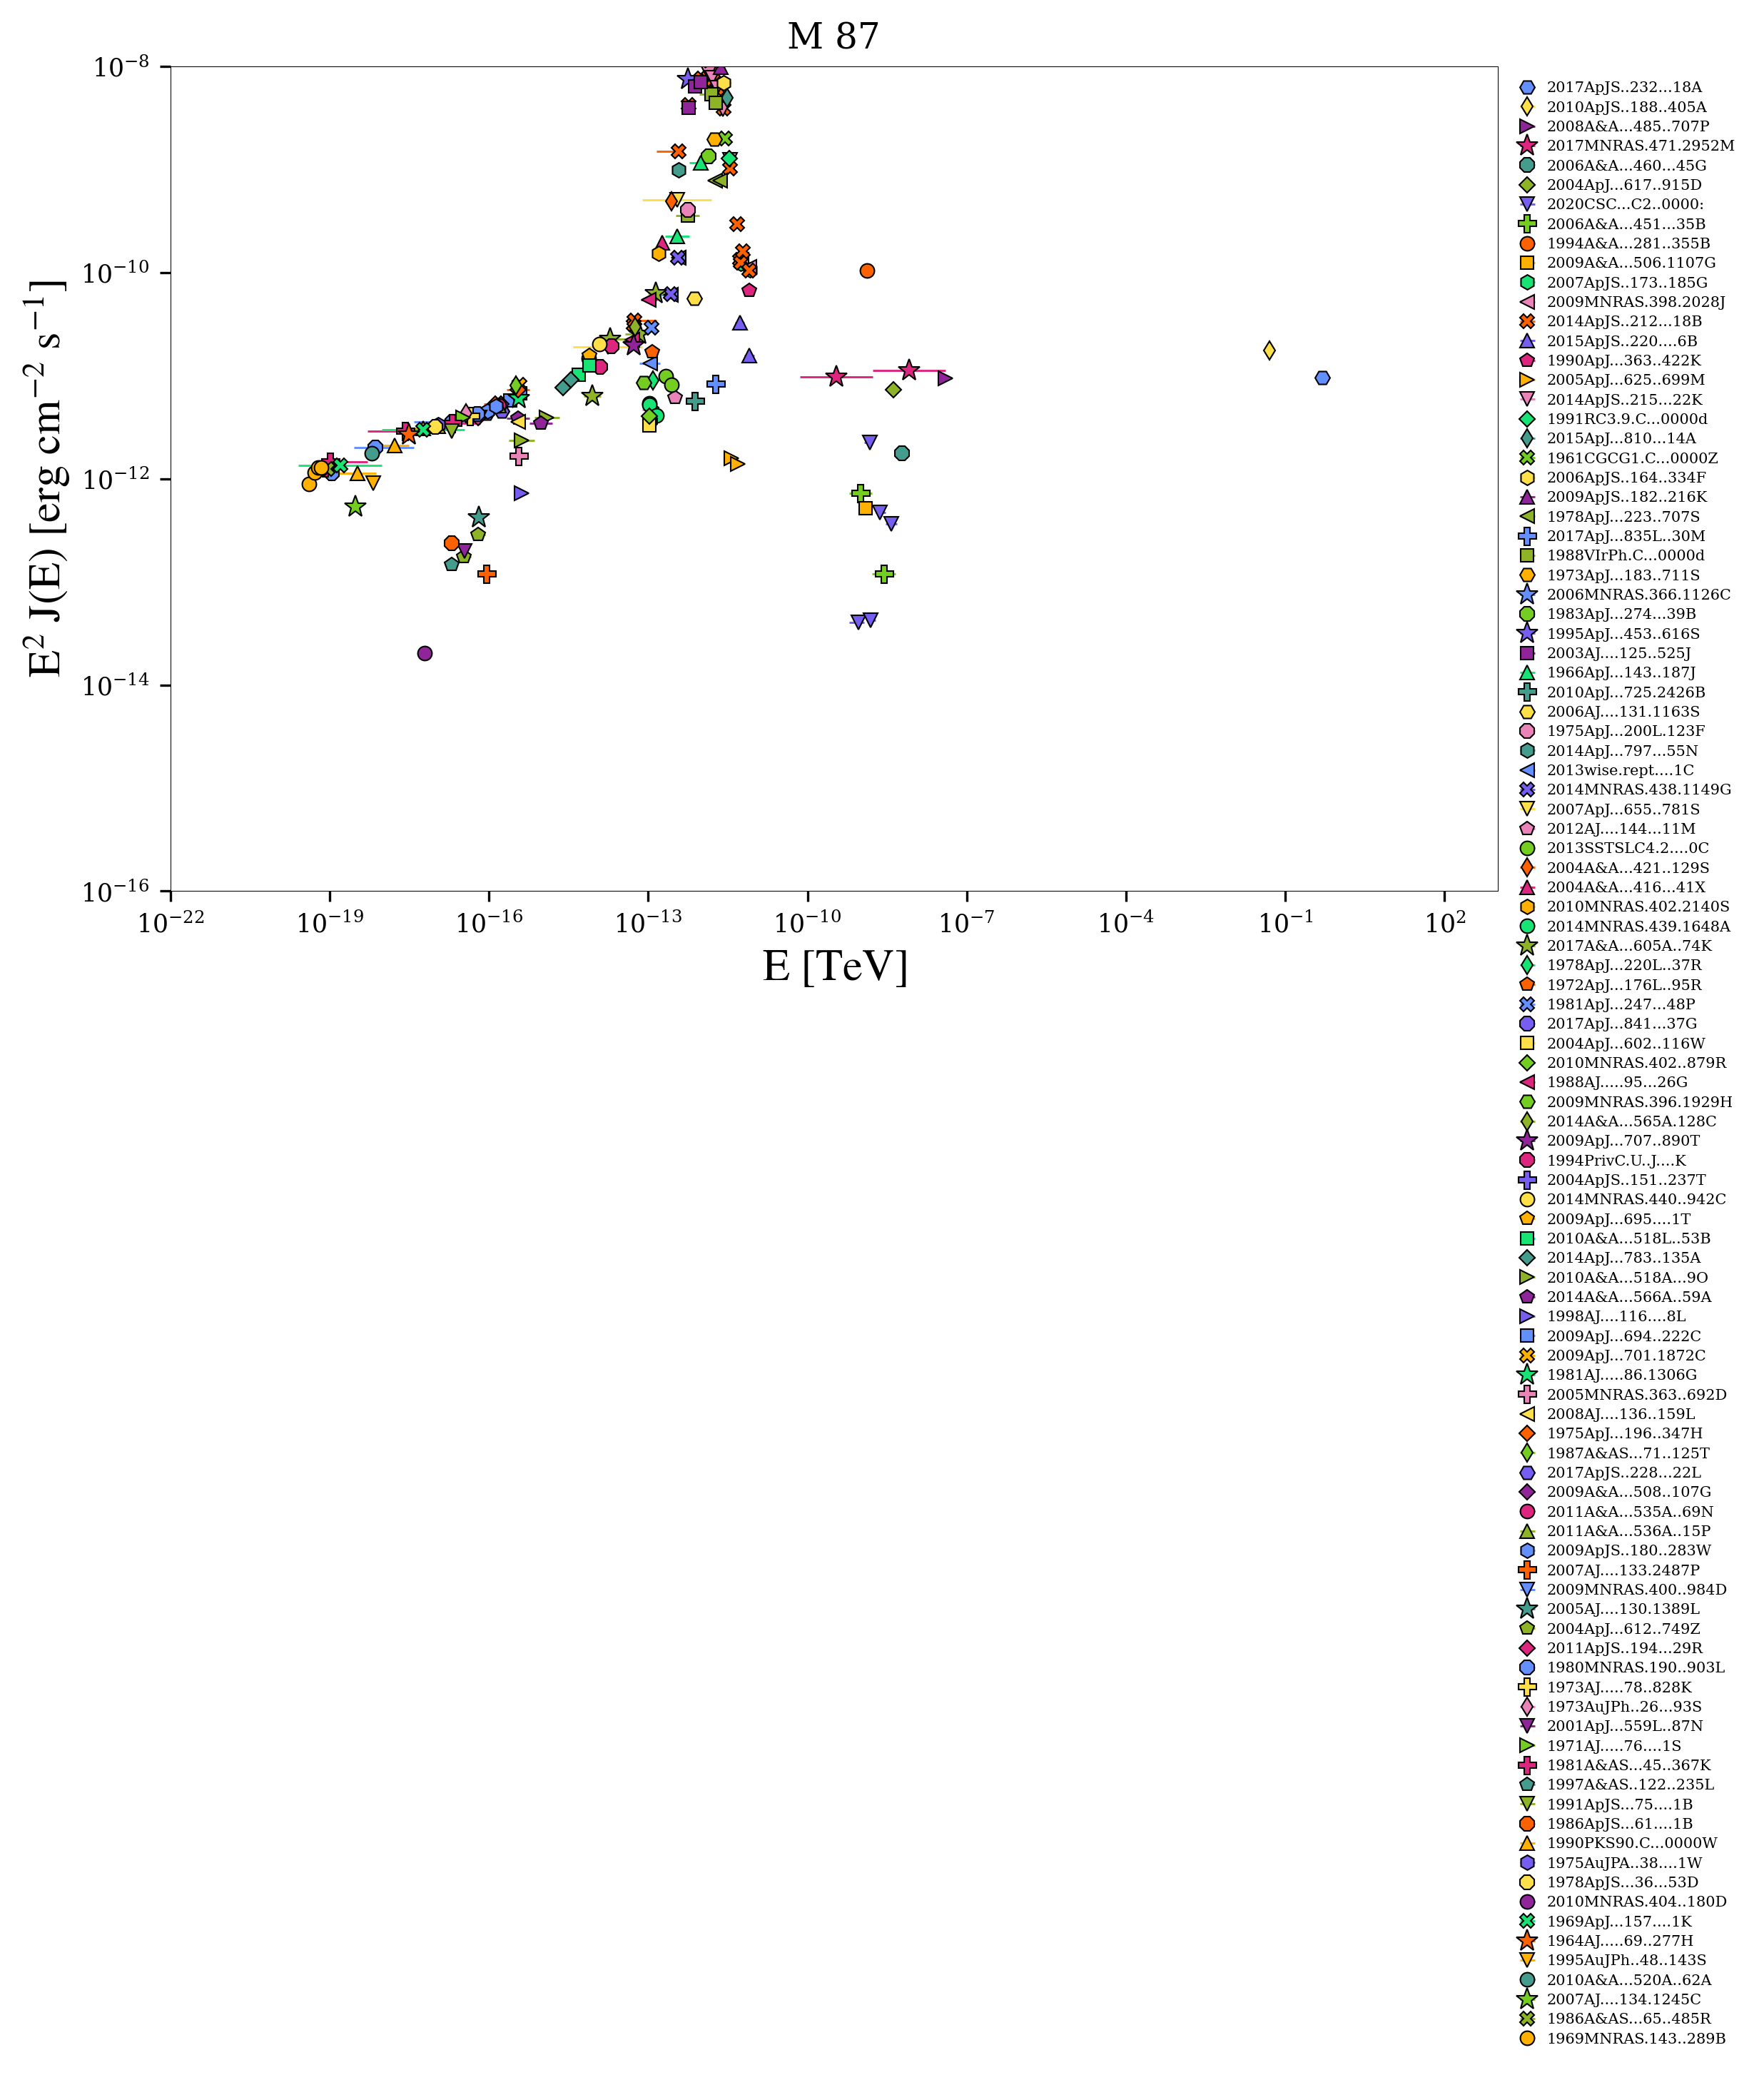

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

kwargs = {"ax": ax, "sed_type": "e2dnde"}

for index, d in enumerate(datasets):
    marker=markers['marker'][index] 
    label=markers['label'][index] 
    markersize=markers['markersize'][index] 
    color=markers['color'][index] 

    d.data.plot(
        label=d.name, 
        c=color,
        marker=marker,
        markersize=markersize,
        ls='None',
        mec='k',
        mew=0.5,
        elinewidth=0.7,
        capsize=1.5,
        **kwargs
    )
    
ax.yaxis.set_units(yaxis_units)
ax.xaxis.set_units(xaxis_units)

ax.set_xlabel(xaxis_label)
ax.set_ylabel(yaxis_label)

ax.set_xlim(energy_bounds)
ax.set_ylim(ylim)

ax.legend(loc='upper left', ncol=1, fontsize=5, bbox_to_anchor=(1,1))

plt.title(f"{source_name}")

plt.savefig(f"{figures_path}/flux_points_VizieR_{name_file}")
plt.show()


In [21]:
target = Target(
    name=source_name, 
    pos_ra=position.ra, 
    pos_dec=position.dec,
)

radius_roi = 0.5 * u.Unit("deg")

roi = ROI(target=target, radius=radius_roi)

config.roi = roi.dict
config.roi.catalogs = "all"

analysis = Counterparts(config)
analysis.run()


Setting logging config: {'level': 'INFO', 'filename': None, 'filemode': None, 'format': None, 'datefmt': None}


SourceCatalogGammaCat:
    name: gamma-cat
    description: An open catalog of gamma-ray sources
    sources: 162

SourceCatalogHGPS:
    name: hgps
    description: H.E.S.S. Galactic plane survey (HGPS) source catalog
    sources: 78

SourceCatalog2HWC:
    name: 2hwc
    description: 2HWC catalog from the HAWC observatory
    sources: 40

SourceCatalog3FGL:
    name: 3fgl
    description: LAT 4-year point source catalog
    sources: 3034

SourceCatalog4FGL:
    name: 4fgl
    description: LAT 8-year point source catalog
    sources: 6659

SourceCatalog2FHL:
    name: 2fhl
    description: LAT second high-energy source catalog
    sources: 360

SourceCatalog3FHL:
    name: 3fhl
    description: LAT third high-energy source catalog
    sources: 1556

SourceCatalog3HWC:
    name: 3hwc
    description: 3HWC catalog from the HAWC observatory
    sources: 65

SourceCatalogExtraHAWC:
    name: extraHAWC
    description: extraHAWC catalog from the HAWC observatory
    sources: 8

SourceCatal

In [22]:
analysis.df_sep

,Source name,RA(deg),dec.(deg),Sep.(deg)
0,3FGL J1230.9+1224,187.727905,12.40610,0.026171
1,4FGL J1230.8+1223,187.712296,12.38830,0.006828
2,2FHL J1230.8+1225,187.703995,12.43180,0.040721
3,3FHL J1230.8+1223,187.703339,12.38888,0.003383


In [23]:
# analysis.datasets.names

In [24]:
# analysis.write_datasets()
# analysis.write_models()

In [25]:
models = Models()
datasets = Datasets()

In [26]:
# path_dir = datasets_dir
# datasets_HE = Datasets.read(filename=f'{path_dir}/datasets.yaml', filename_models=f'{path_dir}/models.yaml')

datasets_HE = analysis.datasets.copy()
models.extend(datasets_HE.models)
datasets.extend(datasets_HE.copy())

In [27]:
xaxis_label = r'$\rm{E\ [MeV] }$'
xaxis_units = u.Unit('MeV')

yaxis_label = r'$\rm{E^2\ J(E)\ [erg\ cm^{-2}\ s^{-1}] }$'
yaxis_units = u.Unit('erg cm-2 s-1')

energy_bounds = [1e1, 1e7] * u.MeV
ylim = [1e-15, 1e-8]

leg_place = dict(
    bbox_to_anchor = (1, 0.5), # Set legend outside plot
    ncol=1, 
#     loc='upper left', 
)
markers = generate_marker_set(datasets.names, 5)

4 unique markers generated


In [ ]:
spectral_model = datasets_HE.models[1].spectral_model

model_fit = SkyModel(
#     spatial_model=spatial_model,
    spectral_model=spectral_model,
    name="model-fit",
)
models.append(model_fit)
display(model_fit.parameters.to_table())

In [ ]:
display(model_fit.parameters.to_table())

In [ ]:
datasets.models = model_fit
fitter = Fit()
result_fit = fitter.run(datasets=datasets)
display(model_fit.parameters.to_table())

In [ ]:
result_fit.success

In [ ]:
datasets.names

In [ ]:
energy_bounds = [1e1, 1e7] * u.MeV
ylim = [1e-15, 1e-8]

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

kwargs = {"ax": ax, "sed_type": "e2dnde"}

for index, d in enumerate(datasets):
    marker=markers['marker'][index] 
    label=markers['label'][index] 
    markersize=markers['markersize'][index] 
    color=markers['color'][index] 

    d.data.plot(
        label=d.name, 
        c=color,
        marker=marker,
        markersize=markersize,
        ls='None',
        mec='k',
        mew=0.5,
        elinewidth=0.7,
        capsize=1.5,
        **kwargs
    )
    
model_fit.spectral_model.plot(energy_bounds=energy_bounds, label=model_fit.name, color="k", **kwargs)
model_fit.spectral_model.plot_error(energy_bounds=energy_bounds, **kwargs)
ax.yaxis.set_units(yaxis_units)
ax.xaxis.set_units(xaxis_units)

ax.set_xlabel(xaxis_label)
ax.set_ylabel(yaxis_label)

ax.set_xlim(energy_bounds)
ax.set_ylim(ylim)

ax.legend(loc='upper left', ncol=1, fontsize=5, bbox_to_anchor=(1,1))

plt.title(f"{source_name}")

plt.savefig(f"{figures_path}/SED_HE_{name_file}")
plt.show()


In [ ]:
analysis.datasets.models = models

In [ ]:
datasets.models = models

In [ ]:
datasets.extend(datasets_VizieR)
analysis.datasets = datasets

In [ ]:
display(models['model-fit'].parameters.to_table())

In [ ]:
display(datasets.models['model-fit'].parameters.to_table())

In [ ]:
datasets.models[0]

In [ ]:
datasets.write()

In [ ]:
config.write(path=f'{outdir}/config.yaml', overwrite=True)

In [ ]:
# config.read(config.general.config_file)

In [ ]:
datasets.write(filename=config.general.datasets_file, filename_models=config.general.models_file, overwrite=True)

In [ ]:
!jupyter nbconvert counterparts.ipynb  --to notebook --output 'counterparts_{source_name}' --output-dir '.'

In [ ]:
convert_ipynb_to_gallery('counterparts.ipynb', output_file_name=f'{outdir}/counterparts_{source_name}')